In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


data = pd.read_csv("F:\cis660\IMDB Dataset.csv", encoding = 'latin1')

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
#Checking for null values

data.isna().sum().sum()

0

In [3]:
df = data

In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data['sentiment'].describe()

count        50000
unique           2
top       positive
freq         25000
Name: sentiment, dtype: object

In [6]:
#Data preprocessing methods

import nltk
import re
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer

#To tokenize words
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')


#Changing into lowercase
df['review'].str.lower()


#Removing the html strips 
def strip_html(x):
    soup = BeautifulSoup(x, "html.parser")
    return soup.get_text()

#To remove the brackets
def remove_brac(x):
    return re.sub('\[[^]]*\]', '', x)

#Remove special characters
def remove_sp_char(x):
    sp_char = r'[^a-zA-z\s]'
    x = re.sub(sp_char, '', x)
    return x

#removing Stopwords
def remove_stopwords(x):
    tokens = tokenizer.tokenize(x)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]    
    filtered_text=' '.join(filtered_tokens)
    return filtered_text

#Stemming
def stemming(x):
    ps = nltk.porter.PorterStemmer()
    x=' '.join([ps.stem(word) for word in x.split()])
    return x


def remove_noise(x):
    x = strip_html(x)
    x = remove_brac(x)
    x = remove_sp_char(x)
    x = remove_stopwords(x)
    x = stemming(x)
    return x

#Removing noise from reviews
df['review'] = df['review'].apply(remove_noise)

In [7]:
df.head()

,review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,a wonder littl product the film techniqu unass...,positive
2,i thought wonder way spend time hot summer wee...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [8]:
label_encoder = preprocessing.LabelEncoder()
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

#Positive - 1
#Negative - 0


In [9]:
df.head()

,review,sentiment
0,one review mention watch oz episod youll hook ...,1
1,a wonder littl product the film techniqu unass...,1
2,i thought wonder way spend time hot summer wee...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [10]:
#a = np.array(df['review'])
#b = np.array(df['sentiment'])

# Tfidf

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv=TfidfVectorizer()
tv_review = tv.fit_transform(df['review'])

In [12]:
from sklearn.model_selection import train_test_split

tv_X = tv_review
Y = df['sentiment']

tv_X_train, tv_X_test, tv_Y_train, tv_Y_test = train_test_split(tv_X, Y, random_state=42, train_size = 0.60)

# LinearSVC

In [13]:
from sklearn.svm import LinearSVC

tv_svm_clf = LinearSVC()

tv_svm_clf.fit(tv_X_train, tv_Y_train)

LinearSVC()

In [14]:
tv_svm_clf_pred = tv_svm_clf.predict(tv_X_test)


In [15]:
from sklearn import metrics
from sklearn.metrics import classification_report 
tv_svm_clf_accuracy_score = metrics.accuracy_score(tv_svm_clf_pred , tv_Y_test)

In [16]:
print ("The accuracy score of tfidf model of svm classifier is ",(tv_svm_clf_accuracy_score*100))

The accuracy score of tfidf model of svm classifier is  88.885


In [17]:
target_names = ['Negative', 'Positive']
print ("Classification report for tfidf model using svm classifier")
print (classification_report(tv_Y_test, tv_svm_clf_pred, target_names=target_names))

Classification report for tfidf model using svm classifier
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      9989
    Positive       0.88      0.90      0.89     10011

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



In [18]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
svm_cf_matrix = confusion_matrix(tv_Y_test, tv_svm_clf_pred, labels=[0,1])
print (svm_cf_matrix)

[[8769 1220]
 [1003 9008]]


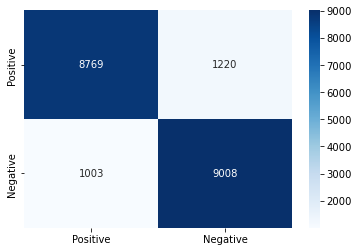

In [19]:
svm_plt_cf_matrix = sns.heatmap(svm_cf_matrix,annot=True, fmt='g', cmap='Blues')

svm_plt_cf_matrix.xaxis.set_ticklabels(['Positive','Negative'])
svm_plt_cf_matrix.yaxis.set_ticklabels(['Positive','Negative'])
plt.show()

# Prediction of new reviews

In [20]:
custom_review='This is a good movie the action scenes are amazing. the acting is god tier. must recommend'

custom_review2 = 'This movie is bad, the plot is terrible. I dont know why reputable actors choose scripts like these'

In [21]:
def user_pred(x):
    x = remove_noise(x)
    x = [x]
    x = tv.transform(x)
    review = tv_svm_clf.predict(x)
    
    if review[0]==1:
        ans = 'Positive'
    if review[0]==0:
        ans = 'Negative'
        
    return ans


In [22]:
print ('the sentiment of the custom review 1 is',user_pred(custom_review))
print ('the sentiment of the custom review 2 is',user_pred(custom_review2))

the sentiment of the custom review 1 is Positive
the sentiment of the custom review 2 is Negative


# Multinomial NB

In [23]:
from sklearn.naive_bayes import MultinomialNB

tv_mnb = MultinomialNB()
tv_mnb.fit(tv_X_train, tv_Y_train)

MultinomialNB()

In [24]:
tv_mnb_pred = tv_mnb.predict(tv_X_test)


In [25]:
tv_mnb_accuracy_score = metrics.accuracy_score(tv_mnb_pred , tv_Y_test)

In [26]:
 print ("The accuracy score of tfidf model using multinomialNB is ",tv_mnb_accuracy_score*100)

The accuracy score of tfidf model using multinomialNB is  85.7


In [27]:
print ("Classification report for tfidf model using multinomial NB")
print (classification_report(tv_Y_test, tv_mnb_pred, target_names=target_names))

Classification report for tfidf model using multinomial NB
              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86      9989
    Positive       0.87      0.84      0.85     10011

    accuracy                           0.86     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.86      0.86      0.86     20000



In [28]:
print("The confusion matrix for Multinomial NB is")
mnb_cf_matrix = confusion_matrix(tv_Y_test, tv_mnb_pred, labels=[0,1])
print(mnb_cf_matrix)

The confusion matrix for Multinomial NB is
[[8723 1266]
 [1594 8417]]


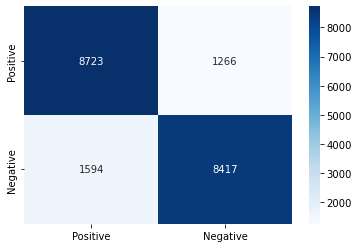

In [29]:
mnb_plt_cf_matrix = sns.heatmap(mnb_cf_matrix,annot=True, fmt='g', cmap='Blues')

mnb_plt_cf_matrix.xaxis.set_ticklabels(['Positive','Negative'])
mnb_plt_cf_matrix.yaxis.set_ticklabels(['Positive','Negative'])
plt.show()

# Decision tree classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

tv_clf = DecisionTreeClassifier(random_state=0)

tv_clf.fit(tv_X_train, tv_Y_train)


DecisionTreeClassifier(random_state=0)

In [31]:
tv_clf_pred = tv_clf.predict(tv_X_test)


In [32]:
tv_clf_accuracy_score = metrics.accuracy_score(tv_clf_pred , tv_Y_test)

In [33]:
print ("The accuracy score of tfidf model of decision tree classifier is ",(tv_clf_accuracy_score*100))

The accuracy score of tfidf model of decision tree classifier is  71.695


In [34]:
print ("Classification report for tfidf model using Decision tree classifier")
print (classification_report(tv_Y_test, tv_clf_pred, target_names=target_names))

Classification report for tfidf model using Decision tree classifier
              precision    recall  f1-score   support

    Negative       0.72      0.72      0.72      9989
    Positive       0.72      0.72      0.72     10011

    accuracy                           0.72     20000
   macro avg       0.72      0.72      0.72     20000
weighted avg       0.72      0.72      0.72     20000



In [35]:
print("The confusion matrix for Decision tree classifier is")
clf_cf_matrix = confusion_matrix(tv_Y_test, tv_clf_pred, labels=[0,1])
print (clf_cf_matrix)

The confusion matrix for Decision tree classifier is
[[7179 2810]
 [2851 7160]]


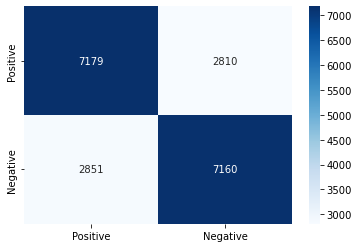

In [36]:
clf_plt_cf_matrix = sns.heatmap(clf_cf_matrix,annot=True, fmt='g', cmap='Blues')

clf_plt_cf_matrix.xaxis.set_ticklabels(['Positive','Negative'])
clf_plt_cf_matrix.yaxis.set_ticklabels(['Positive','Negative'])
plt.show()

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(tv_X_train, tv_Y_train)



LogisticRegression()

In [38]:
tv_lr_pred = lr.predict(tv_X_test)

In [39]:
tv_lr_accuracy_score = metrics.accuracy_score(tv_lr_pred , tv_Y_test)

In [40]:
print ("The accuracy score of tfidf model of decision tree classifier is ",tv_lr_accuracy_score*100)

The accuracy score of tfidf model of decision tree classifier is  88.675


In [41]:
print ("Classification report for tfidf model using Logistic Regression classifier is ")
print (classification_report(tv_Y_test, tv_lr_pred, target_names=target_names))

Classification report for tfidf model using Logistic Regression classifier is 
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      9989
    Positive       0.88      0.90      0.89     10011

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



In [42]:
print("The confusion matrix for Logistic Regression classifier is ")
lr_cf_matrix = confusion_matrix(tv_Y_test, tv_lr_pred, labels=[0,1])
print(lr_cf_matrix)

The confusion matrix for Logistic Regression classifier is 
[[8716 1273]
 [ 992 9019]]


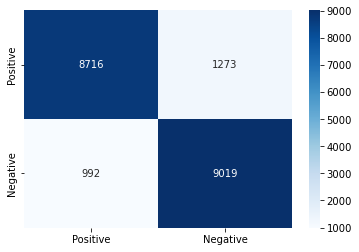

In [43]:
lr_plt_cf_matrix = sns.heatmap(lr_cf_matrix,annot=True, fmt='g', cmap='Blues')

lr_plt_cf_matrix.xaxis.set_ticklabels(['Positive','Negative'])
lr_plt_cf_matrix.yaxis.set_ticklabels(['Positive','Negative'])
plt.show()

# Random Forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

rc = RandomForestClassifier()

rc.fit(tv_X_train, tv_Y_train)


RandomForestClassifier()

In [45]:
rc_pred = rc.predict(tv_X_test)

In [46]:
rc_accuracy_score = metrics.accuracy_score(rc_pred , tv_Y_test)

In [47]:
print ("The accuracy score of tfidf model of Random forest classifier is ",rc_accuracy_score*100)

The accuracy score of tfidf model of Random forest classifier is  84.16


In [48]:
print ("Classification report for tfidf model using Random forest Classifier is ")
print (classification_report(tv_Y_test, rc_pred, target_names=target_names))

Classification report for tfidf model using Random forest Classifier is 
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84      9989
    Positive       0.84      0.85      0.84     10011

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



In [49]:
print("The confusion matrix for Random forest classifier is ")
rc_cf_matrix = confusion_matrix(tv_Y_test, rc_pred, labels=[0,1])
print(rc_cf_matrix)

The confusion matrix for Random forest classifier is 
[[8372 1617]
 [1551 8460]]


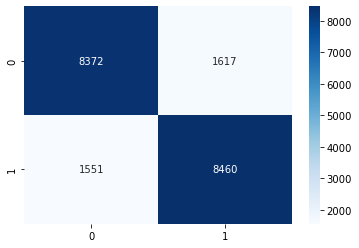

In [50]:
rc_plt_cf_matrix = sns.heatmap(rc_cf_matrix,annot=True, fmt='g', cmap='Blues')

lr_plt_cf_matrix.xaxis.set_ticklabels(['Positive','Negative'])
lr_plt_cf_matrix.yaxis.set_ticklabels(['Positive','Negative'])
plt.show()